In [1]:
%matplotlib inline


from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
import pickle

(13233, 62, 47)


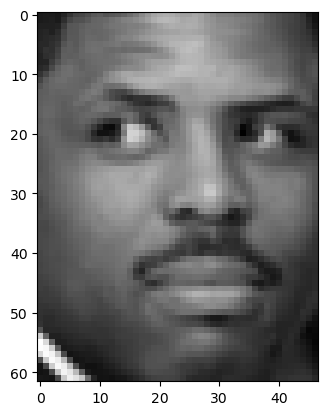

In [2]:
dataset = fetch_lfw_people(min_faces_per_person=1).images #1.collect face images
print(dataset.shape)

plt.imshow(dataset[123], cmap='gray')

In [21]:
F = dataset.reshape((dataset.shape[0], dataset.shape[1] * dataset.shape[2])) #2.construct data matrix A
M = F.mean(axis=0)
A = F - M

In [10]:
U, S, Vt = np.linalg.svd(A) #3.apply SVD
print(U.shape, S.shape, Vt.shape)

(13233, 13233) (2914,) (2914, 2914)


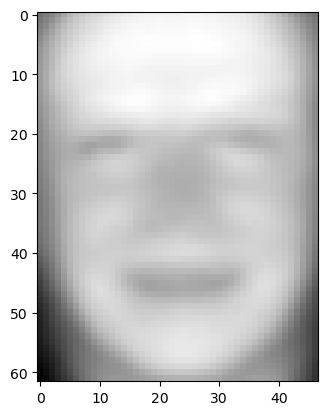

In [22]:
plt.imshow((Vt[0]).reshape(62, 47), cmap='gray') #example of eigenface

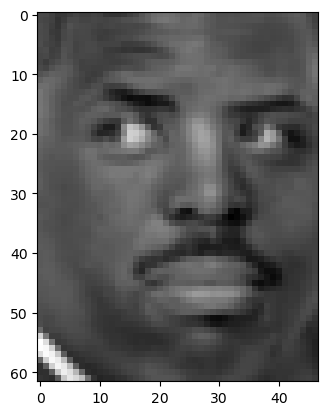

In [23]:
coef = np.dot(A[123], Vt.T) #4.Reconstruction of Face Image
reconstructed_data = np.dot(coef, Vt) + M 
plt.imshow(reconstructed_data.reshape(62, 47), cmap = 'gray')

In [27]:
import random

lfw_people = fetch_lfw_people(min_faces_per_person=2)  
X = lfw_people.data  
y = lfw_people.target  
target_names = lfw_people.target_names  


unique_people = np.unique(y)
selected_people = random.sample(list(unique_people), 10)  


selected_faces = []
for person_id in selected_people:
    person_indices = np.where(y == person_id)[0]  
    selected_indices = np.random.choice(person_indices, 2, replace=False)  
    selected_faces.extend(X[selected_indices])  

P = np.array(selected_faces).T  

print("P 행렬 크기:", P.shape)


P 행렬 크기: (2914, 20)


In [29]:
U, S, Vt = np.linalg.svd(P, full_matrices=False)

coefficients = []
for i in range(P.shape[1]): 
    projection = np.dot(P.T[:, i], Vt.T)  
    coefficients.append(projection)

coefficients = np.array(coefficients)
print("Vt.T (아이겐페이스)의 크기:", Vt.T.shape)
print("각 열의 계수 (Projection Coefficients):", coefficients.shape)
print(coefficients)

Vt.T (아이겐페이스)의 크기: (20, 20)
각 열의 계수 (Projection Coefficients): (20, 20)
[[-1.28312635e+00 -2.57574379e-01  1.73746288e-01 -4.92065609e-01
   4.06625122e-01 -3.47203463e-01  4.36412185e-01  1.56298161e-01
   2.62544096e-01 -1.39169246e-01 -6.65668249e-02  9.92423147e-02
  -7.21596554e-02 -2.31750280e-01  1.76096931e-01 -3.37331444e-02
   4.34098430e-02  6.67817071e-02  8.16789269e-02 -4.86505181e-02]
 [-1.34236598e+00 -2.24791348e-01  1.72072038e-01 -4.98036176e-01
   4.23750669e-01 -3.10691535e-01  4.80854571e-01  9.77561474e-02
   2.43649215e-01 -1.66148871e-01  1.57960206e-02  8.38426426e-02
  -1.08713649e-01 -2.78692871e-01  1.94507957e-01 -4.38468605e-02
   6.79140538e-02  2.26024166e-03  8.40487480e-02 -9.75602865e-02]
 [-1.40352654e+00 -2.31010064e-01  1.20810948e-01 -4.44572270e-01
   3.82740915e-01 -1.80880815e-01  3.53354633e-01  2.20673084e-02
   1.48323119e-01 -1.95388079e-01  1.43857151e-01 -1.29533395e-01
  -1.51735902e-01 -2.96959579e-01  1.24039680e-01 -3.80791128e-02
  

In [32]:
from scipy.spatial.distance import cdist

print("계수 배열 크기:", coefficients.shape)

distances = cdist(coefficients, coefficients, metric='euclidean')

np.fill_diagonal(distances, np.inf)

pairs = []  
for _ in range(coefficients.shape[0] // 2):  
    i, j = np.unravel_index(np.argmin(distances), distances.shape)
    pairs.append((i, j))  
    distances[i, :] = np.inf 
    distances[:, i] = np.inf
    distances[j, :] = np.inf  
    distances[:, j] = np.inf

print("짝지어진 이미지 인덱스:", pairs)

for i, j in pairs:
    print(f"짝: ({i}, {j}), 거리: {np.linalg.norm(coefficients[i] - coefficients[j])}")

계수 배열 크기: (20, 20)
짝지어진 이미지 인덱스: [(17, 18), (14, 15), (10, 11), (12, 13), (0, 1), (3, 4), (6, 7), (16, 19), (8, 9), (2, 5)]
짝: (17, 18), 거리: 0.07391108572483063
짝: (14, 15), 거리: 0.10700606554746628
짝: (10, 11), 거리: 0.1263924092054367
짝: (12, 13), 거리: 0.15812677145004272
짝: (0, 1), 거리: 0.1757817566394806
짝: (3, 4), 거리: 0.1872934103012085
짝: (6, 7), 거리: 0.2050538808107376
짝: (16, 19), 거리: 0.2336360365152359
짝: (8, 9), 거리: 0.31716522574424744
짝: (2, 5), 거리: 0.551677405834198
